# Homework 5

Due date: Jun 2, 2024

### Submission instructions: 
- __Autograder will be used for scoring, you are required to write a module in a file `hw5module.py` as in Homeworks 1 and 2.__ 
- You are also required to convert this notebook as a separate Python file, __`hw5.py`__. 
- Also, please keep your indentifiable information (ID, name, and a list of collaborators) in a separate file __`hw5_studentinfo.txt`__. 
- Submit __`hw5.ipynb`__ (this notebook), `hw5.py`, `hw5module.py`, and `hw5_studentinfo.txt` on Gradescope under the window "Homework 5 - code". Do **NOT** change the file name. This will be checked by the autograder as well. 
- Make sure all your code and text outputs in the problems are visible in your PDF submission. 

## Introduction

What's your favorite movie? Wouldn't it be nice to find more shows that you might like to watch, based on ones you know you like? Tools that address questions like this are often called "recommender systems." Powerful, scalable recommender systems are behind many modern entertainment and streaming services, such as Netflix and Spotify. While most recommender systems these days involve machine learning, there are also ways to make recommendations that don't require such complex tools. 

In this homework, you'll use webscraping to answer the following question: 

> What movie or TV shows share actors with your favorite movie?

The idea of this question is that, if the movie Y has many of the same actors as the movie X, and you like X, you might also enjoy Y. 

This homework has two parts. In the first, larger part, you'll write a webscraper for finding shared actors on TMDB. In the second, smaller part, you'll use the results from your scraper to make recommendations. 

You need to meet the specifications for a complete list of what you need to do to obtain full credit. 

## Instructions

### 1. Setup

#### 1.1. Locate the Starting TMDB Page

Pick your favorite movie, and locate its TMDB page by searching on [https://www.themoviedb.org/](https://www.themoviedb.org/). For example, my favorite movie is _Harry Potter and the ~~Sorcerer's~~Philosopher's Stone_.
Its TMDB page is at:  


https://www.themoviedb.org/movie/671-harry-potter-and-the-philosopher-s-stone/


Save this URL for a moment. 

#### 1.2. Dry-Run Navigation

Now, we're just going to practice clicking through the navigation steps that our scraper will take. 

First, click on the *Full Cast & Crew* link. This will take you to a page with URL of the form 

```
<original_url>cast/
```

Next, scroll until you see the *Cast* section. Click on the portrait of one of the actors. This will take you to a page with a different-looking URL. For example, the URL for Alan Rickman, who played Severus Snape, is 


https://www.themoviedb.org/person/4566-alan-rickman


Finally, scroll down until you see the actor's *Acting* section. Note the titles of a few movies and TV shows in this section. 

Our scraper is going to replicate this process. Starting with your favorite movie, it's going to look at all the actors in that movie, and then log all the *other* movies or TV shows that they worked on. 

At this point, it would be a good idea for you to use the Developer Tools on your browser to inspect individual HTML elements and look for patterns among the names you are looking for.

#### 1.3. Create your module

No template is provided for this homework. You will write your two functions in a separate file `hw5module.py`.

#### 1.4. Some hints

You may run into `403` (forbidden) errors once the website detects that you’re a bot. See the web scraping lecture note and these links ([link1](https://doc.scrapy.org/en/latest/topics/practices.html#avoiding-getting-banned), [link2](https://scrapeops.io/python-scrapy-playbook/scrapy-403-unhandled-forbidden-error/), [link3](https://scrapeops.io/web-scraping-playbook/403-forbidden-error-web-scraping/), [link4](https://scrapingrobot.com/blog/most-common-user-agents/)) for how to work around that issue. Adding a delay for each page and changing user agent will often be most helpful!

Keep an eye out for `403` error you see! Make sure to examine the `status_code` attribute of the returned value from `requests.get()`. You want your status to be `200` (meaning OK). Print something if you see `403` (or raise an `Exception` if you are familiar with it).
If they know that you are on Python or if you are requesting pages without much delays, they will certainly try to block you. One way to change user agent on your code is presented in the lecture note. For the autograder to finish in reasonable time, please do not put the delays longer than two seconds between requests.

### 2. Write Your Scraper

Now, you will write a web scraper for a movie of your choice by giving its subdirectory on TMDB website as an argument. We will implement two parsing functions.

<!-- `parse(suffix)` should assume that you start on a movie page, and then navigate to the *Full Cast & Crew* page. Remember that this page has url `<movie_url>cast`. (You are allowed to hardcode that part.) Once there, the `parse_full_credits(suffix)` should be called. The `parse()` function does not return any data. This function should be no more than 5 lines of code, excluding comments and docstrings. Example: `parse("671-harry-potter-and-the-philosopher-s-stone")`.-->
- `parse_full_credits(movie_directory)` should assume that you start on the *Full Cast & Crew* page with the url `https://www.themoviedb.org/movie/<movie_directory>/cast`. Its purpose is to call the function `parse_actor_page(df, actor_directory)` for the page of each actor listed on the page. Crew members are not included (consider using `not` command in CSS selector). Initialize an empty `DataFrame` with two columns `actor` and `movie_or_TV_name`, then call the function `parse_actor_page` for each actor. The `parse_full_credits()` function returns the fully loaded `df`, with actor names and movie titles each actor worked on. The `DataFrame` should not have duplicate entries, and it should be sorted by actor name as the primary key, then movie titles. Try to avoid visiting the same page multiple times. This function should be no more than 10 lines of code, excluding comments and docstrings. 
  - Example: `df = parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")`
- `parse_actor_page(df, actor_directory)` should assume that you start on the page of an actor. For each movie with the "Acting" role, you will add a row to the `DataFrame` `df` with two columns, `actor` and `movie_or_TV_name`. Please only include the works listed in "Acting" section of the actor page. Keep in mind that "Acting" might not be on the top of their lists; for example, [David Holmes](https://www.themoviedb.org/person/1796507-david-holmes) is credited with an acting role in HP1, but spent most of his career as a stunt double of Daniel Radcliffe (as a part of Crew). On his page, you will see "Crew" before "Acting". 
Note that you will need to determine both the name of the actor and the name of each movie or TV show through parsing the HTML page. This function should be no more than 20 lines of code, excluding comments and docstrings. It should return the `DataFrame` `df` with all the works of the actor added at the end of `df`. 
  - Example: `df_updated = parse_actor_page(df, "10980-daniel-radcliffe")`

Provided that these functions are correctly implemented, you can run the code 
```python
df = parse_full_credits("671-harry-potter-and-the-philosopher-s-stone")
```
to create a `DataFrame` with a column for actors and another for movies or TV shows for _Harry Potter and the Philosopher's Stone_. You might want to save the result as a `.csv` file before proceeding to the next part.

Test your functions; make sure to check the following: 
- `parse_actor_page()`
  - only parses all the works under the "Acting" section
  - even if "Acting" is not on the top of the lists
  - remove duplicate work names within each actor (added 5/23)
- `parse_full_credits()` 
  - is parsing all the actors,
  - is not parsing crew members,
  - does not parse duplicate pages, and
  - of course, if the results are correct.

#### Challenge
If you’re looking for a challenge, think about ways that may make your recommendations more accurate. Consider scraping the number of episodes as well or limiting the number of actors you get per show to make sure you only get the main series cast. If you do so, please use separate function names.

### 3. Make Your Recommendations 

Once you're happy with the operation of your webscraper, compute a sorted list with the top movies and TV shows that share actors with your favorite movie. For example, it may have two columns: one for “movie names” and “number of shared actors”.

Feel free to be creative. You can show a pandas data frame, a chart using `matplotlib` or `plotly`, or any other sensible display of the results. 

### 4. Documentation

In this Jupyter Notebook, you should describe how your scraper works, as well as the results of your analysis. When describing your scraper, I recommend dividing it up into the two distinct parsing function, and discussing them one-by-one. For example: 

> *In this report, I'm going to make a super cool web scraper...*
> *Here's how we set up the project...*
> ```
> <implementation of parse()>
> ```
> *This function works by...*

> ```
> <implementation of parse_full_credits()>
> ```
> *To write this function, I...*

In addition to describing your scraper, your report should include a table and visualization of numbers of shared actors. 

You should guide your reader through the process of setting up and running the scraper.


## Specifications

### Coding Problem

1. Each of the three parsing methods are correctly implemented.
2. `parse()` is implemented in no more than 5 lines. 
3. `parse_full_credits()` is implemented in no more than 5 lines. 
4. `parse_actor_page()` is implemented in no more than 15 lines. 
5. A table or list of results or pandas dataframe is shown.
6. A visualization with `matplotlib`, `plotly`, or `seaborn` is shown. 

### Style and Documentation

7. Each of the three `parse` functions has a short docstring describing its assumptions (e.g. what kind of page it is meant to parse) and its effect, including navigation and data outputs. 
8. Each of the three `parse` functions has helpful comments for understanding how each chunk of code operates. 

### Writing

9. The report is written in engaging and clear English. Grammar and spelling errors are acceptable within reason. 
10. The report explains clearly how to set up the project, run the scraper, and access the results. 
11. The report explains how each of the three `parse` methods works. 

### ANSWER

#### Preface 

The documentation for web scrapping and recommending movies uses the following fucntions: `parse_actor_page`, `parse_full_credits`, and `plot_cast_movies`. The `parse_actor_page` `parse_full_credits` are located in `hw5module.py` and were imported from the `hw5module.py` ([file](./hw5module.py)) located in the current working directory.

#### Goal

Use web scraping to extract cast members from a TMDB movie directory code supplied by a user. Recommend movies or TV shows that credit the most actors from the original movie cast.

#### Investigate TMDB Structure

The TMDB structure was investigated by navigating potential paths that the webscrapper would take. The paths to cast member credited movies are shown below. In addition, to documenting paths, SelectorGadget was used to select and filter css elements to later be used to extract link extentions and information form the pages.

```
Possible Paths to cast member credited movies:
1) [Movie Profile] => [Movie Cast] => [Cast Profile] = [Cast Member credited Movies]
2)                    [Movie Cast] => [Cast Profile] = [Cast Member credited Movies]
3)                                    [Cast Profile] = [Cast Member credited Movies]
```

#### Movie and Actor Directory Error Handling

Before connecting to the TMDB movie link, The functions, `parse_actor_page` and `parse_full_credits`, checked for bad movie and actor directories. If a bad TMDB movie or actor directory is supplied, TMDB does not raise a 403 error; therefore, to raise an error to the user, webscrapping was used to check if one of the website headings told the user if there was an error (See Webscraping Below).

Code Snippets of `parse_full_credits` that error catch links provided:
```python
# Use BeautifulSoup and Webscraping to check if not a TMDB movie and raise error:
if soup.select('h2')[0].text == "Oops! We can't find the page you're looking for":
        raise Exception("Bad TMDB movie Link")
```

#### Use Request to get the Website's HTML

The url to be requested was created by adding the directory to a movie cast and actor profile template urls. The `parse_actor_page` and `parse_full_credits` functions used the python library, `requests`, to get the html code from TMDB for webscraping. If the link is a valid TMDB link, a request will be made to the website a request will get the html code. A request that is successfull will have a status code equal to 200. If the connection was unsuccessfull or TBMD assumes you are a bot, then the status code will be 403. If the status code is 403 `parse_actor_page` and `parse_full_credits` will raise an error. 

Code Snippets used in `parse_actor_page` and `parse_full_credits` that error catch a status code 403:
```python
# Start new session/browser
s = requests.session()
# Randomly select a valid User Agent from a list of user agents
headers = {'User-Agent': random.choice(user_agents)}
# Get HTML from link as a the user agent
response = s.get(link, headers=headers)
# if request.response status code is 403 then raise error:
if response.status_code == 403:
    raise Exception("403 Error. Check link, internet, and bot status.")
```

#### Denfense Against Bot Detection

__Random User Agents__

One way to evade bot detection is to change the user information that is presented to TMDB. This makes TMDB think that a new user is accessing the website from the same IP address. A list of new valid user agents was aquired from a [github post](https://gist.github.com/pzb/b4b6f57144aea7827ae4). For `parse_actor_page` and `parse_full_credits` a new session was created with a random user agent from a list of valid user agents. This simulates a new user opening up a new browser. After requesting the page. the session was closed to avoid too many sessions being open.

Example of a similulated User Agent:
```
Mozilla/5.0 (Windows NT 5.1; rv:30.0) Gecko/20100101 Firefox/30.0
```

__Clearing Cache__

Cache can be used by TMDB to track former visits to TMDB; therefore after requesting each session, the sessions cache was cleared.

Code Snippets used in `parse_actor_page` and `parse_full_credits` that clear cache:


Code Snippets used in `parse_actor_page` and `parse_full_credits` that simulate new browsers, randomize User Agents, clear cache and close session:
```python
# Start new session/browser
s = requests.session()
# Randomly select a valid User Agent from a list of user agents
headers = {'User-Agent': random.choice(user_agents)}
# Get HTML from link as a the user agent
response = s.get(link, headers=headers)
# Clear cookies after accessing HTML data
s.cookies.clear() 
...
# Close session/browser
s.close()
```

__Random Delay between requests__

Periodic and quick requests to TMDB can be a sign that you are a bot. To give the presense as a user, a random integer was generated to be supplied to a sleep function. This serviced as a random delay between requests.

```python
time.sleep(random.randint(1, 3))
```
#### WebScraping

__parse_full_credits:__

`Requests` and  `BeautifulSoup` were used to get the html data and select the css elements provided by using   `SelectorGadget`. The text was selected from the css element giving a list of texts that were in the css element. This was perfomed in the `parse_actor_page` and `parse_full_credits` fucntions. The goal of the `parse_full_credits` is to extract actor profile directories from a movie cast list. `SelectorGadget` was used to exclude crewmembers who are not actors. The extracted directories were not full links; therefore, the parent domain was added as a prefix to the link. The link now directed the bot to the actor's profile, but there was information that we didnt want to include like awards. To solve this issue, a filter was appended as a suffix to the url which used TMDB's built in filtering function. This was done for all actors in the original movie cast and were recorded in a list.The list was used to loop through all actor profile links using a for loop. For each loop, `parse_actor_page` was called where a actors link and an dataframe were supplied. 

`parse_full_credits` Function:

```python
def parse_full_credits(movie_directory, user_agents=user_agents):
    """
    Create a list of cast members from a user provided movie cast TMDB link and
    and for each cast member call parse_actor_page to append cast member movie
    appearances.
    ---
    Args:
        movie_directory: (String) Movie  TMDB link.
    Return:
        df: (pd.DataFrame) Actor and Movie combinations DataFrame
    """
    # Requesting TMDB movie site
    url = f"https://www.themoviedb.org/movie/{movie_directory}/cast"
    headers = {'User-Agent': random.choice(user_agents)} # select a user agent
    s = requests.session() # start new session/browser as user agent
    response = s.get(url, headers=headers) # get raw html
    if response.status_code == 403: # If connection failed
        raise Exception("403 Error. Check link, internet, and bot status.")
    data = response.text # Raw html from TMDB
    s.cookies.clear() # clear cookies
    s.close() # close session/browser
    
    # Webscraping
    soup = BeautifulSoup(data, 'html.parser') # parse html from TMDB
    cast_crud = soup.select(".pad:nth-child(1) a")
    if soup.select('h2')[0].text == "Oops! We can't find the page you're looking for":
        raise Exception("Bad TMDB movie Link") # check for Empty TMDB page
    cast_link = np.unique([link['href'][8:] for link in cast_crud]) # list of actor links
    
    # Loop through list of actor links an supply to parse_actor_page()
    df = pd.DataFrame(columns=['actor', 'movie_or_TV_name']) # init dict
    for link in cast_link: # loop actor links
        time.sleep(random.randint(1, 2)) # Rand. Delay between requests
        df = parse_actor_page(df, link, user_agents) # call parse_actor_page
    
    # Sort and remove duplicates. Occurs when an actor has mulitple role in a movie
    df = df.sort_values(by=["actor","movie_or_TV_name"])
    return df

def show_results(df):
    """
    Report df shape, check for duplicates, and show first 5 rows.
    ---
    Args:
        df: (pd.DataFrame) Dataframe with actor and movie_or_TV_name columns
    Return:
        None
    """
    # Report actor#_df shape, check for duplicates, and show first rows
    dupe_sum = df.duplicated(['actor', 'movie_or_TV_name']).sum() # sum of duplicates
    print(f"movie_df Shape: {df.shape}") # report shape
    print(f"Number of Duplicates: {dupe_sum}") # report duplicates
    print(df.head()) # report First 5 rows

def plot_results(df, movie, threshold):
    """
    Plot actor and movie_or_TV_name dataframe
    ---
    Args:
        df: (pd.DataFrame) Dataframe of actor and movie_or_TV_name
        movie: (string) Original movie name used to generate the dataframe
        threshold: (int) Filtering threshold for number of shared actors of a movie 
    Return:
        None
    """
    # Display dataframe metrics
    show_results(df) # print results
    
    # Preprocessing
    data = df[df['movie_or_TV_name'] != movie] # filter original movie
    most = data.value_counts('movie_or_TV_name').index[0] # Highest frequency movie
    print(f"\n\nThe next movie you should see is: {most}") # Recommendation
    data = data.groupby('movie_or_TV_name').filter(lambda x: len(x) > threshold) # Threshold filter
    
    # Plotting
    plt.figure(figsize=(15, 5)) # init figure and size
    ax = sns.countplot( # count plot
        data=data, 
        x="movie_or_TV_name",
        gap=0.5
    )
    plt.title("Shared Actor Frequency per Movie") # title
    plt.ylabel("Frequency") # y title
    plt.xlabel("Movie Name") # x title
    plt.xticks(rotation=45, ha='right')
    plt.show() # show plot
```

<div>
<center><img src="https://static.semrush.com/blog/uploads/media/b3/d3/b3d33c62a4326a8b55f15f7e2047527d/qctdKqobDZ6lJUqwdKpcyMG4l2BUR3Y0zkkONYv1nQl3MFBh3ZXvi3A_56xLCtk8x_NCW1bnk8Ac421mT9hIx-AMG8DVeHEjEuZOT0aYN1xoPLGdgSLRru1yDpqR9EP0H0Jyi41W4spOgX8zCn6gP9k.webp" width="400"/><br>
Figure 1: An digram of how the link was extracted.</center><div>  
__parse_actor_page:__

Similar to `parse_full_credits`, `SelectorGadget`, `requests`, and `BeautifulSoup` were used to scrape a list of movies an actor/actress was credited in. If the cast member/actor performed in an adult film, they were not included in the dataframe. This was accomplished by checking if any of the movies were blurred. Otherwise, a css selector was used to extract the actor's name and credited movies. This was appended to the dataframe and  returned.

`parse_actor_page` Function:
```python
def parse_actor_page(df, actor_directory, user_agents=user_agents):
    """
    Use the actors TMDB profile link to list movies that actor was a castmember of 
    and append the actor's name and movie name to df.
    ---
    Args:
        df: (pd.DataFrame) Actor and Movie DataFrame
        actor_directory: (String) Actor's profile TMDB link
    Return:
        df: (pd.DataFrame) df with appended actor movie combinations
    """
    # Requesting TMDB movie site
    url = f"https://www.themoviedb.org/person/{actor_directory}?credit_department=Acting"
    headers = {'User-Agent': random.choice(user_agents)} # Random User Agent
    s = requests.session() # Initiate new session
    response = s.get(url, headers=headers) # Go to link as Random User
    if response.status_code == 403: # check for failed connection
        raise Exception("403 Error. Check link, internet, and bot status.")
    data = response.text # raw html from TMDB
    s.cookies.clear() # clear cookies
    s.close() # close session/browser
    
    # Webscraping
    soup = BeautifulSoup(data, 'html.parser') # parse html from TMDB
    try: # Try to get actor's name
        actor = soup.select('.title a')[0].get_text() # extract actor's name
    except:
        raise Exception("Error at actor name")
    if soup.select('.item_adult_true'): # check if movie name is blurred
        print(f"{actor} Does Adult Films! Not Included.")
        return df # return df to skip adding actor to df
    movies = soup.select('.tooltip bdi') # returns a list of movies
    
    # Append the actor's name and movie name to df
    for movie in movies:
        movie_iter = pd.DataFrame({ # convert dict to pd.DataFrame
            'actor': [actor], # actor's name
            'movie_or_TV_name': [movie.get_text()] # movie name
        }) 
        df = pd.concat([df, movie_iter], ignore_index=True) # append row to df
    if df.empty:
        pass
    else:
        df = df.sort_values(by=["actor","movie_or_TV_name"]).drop_duplicates()
    return df # return df with appended actor-movie/tv rows
```
    
#### Interpreting Data

The dataframe produced by `parse_actor_page` and `parse_full_credits` was preprocessed by filtering out the original movie name and setting a threshold for the total number of shared credited actors. The data was visualized by using matplotlib and seaborn's countplot. Lastly, the movie/TV show with the most shared actors was recomended to the user.

In [1]:
import numpy as np
import pandas as pd
import polars as pl

from hw5module import parse_full_credits, parse_actor_page, show_results, plot_results

#### Unit Test 1: Initial

In [2]:
# Empty dictionary used for all test
df = pd.DataFrame(columns=['actor', 'movie_or_TV_name']) # init actor df

# Test Inputs
directory = "786892-furiosa-a-mad-max-saga"
actor = "1397778-anya-taylor-joy"

# Test webscrape functions
actor1_df = parse_actor_page(df, actor) # test parse_actor_page
test1_df = parse_full_credits(directory) # test parse_full_credits

In [3]:
show_results(actor1_df)

movie_df Shape: (47, 2)
Number of Duplicates: 0
              actor                                   movie_or_TV_name
8   Anya Taylor-Joy                                          Amsterdam
38  Anya Taylor-Joy                                           Atlantis
30  Anya Taylor-Joy                                              Barry
13  Anya Taylor-Joy  Cinderella: A Comic Relief Pantomime for Chris...
12  Anya Taylor-Joy                        Creating The Queen's Gambit


movie_df Shape: (1190, 2)
Number of Duplicates: 0
             actor         movie_or_TV_name
0    Adam Thompson  Furiosa: A Mad Max Saga
1  Adam Washbourne  Furiosa: A Mad Max Saga
2        Alex Time  Furiosa: A Mad Max Saga
3        Alex Time                   Harrow
4     Alyla Browne     Children of the Corn


The next movie you should see is: Mad Max: Fury Road


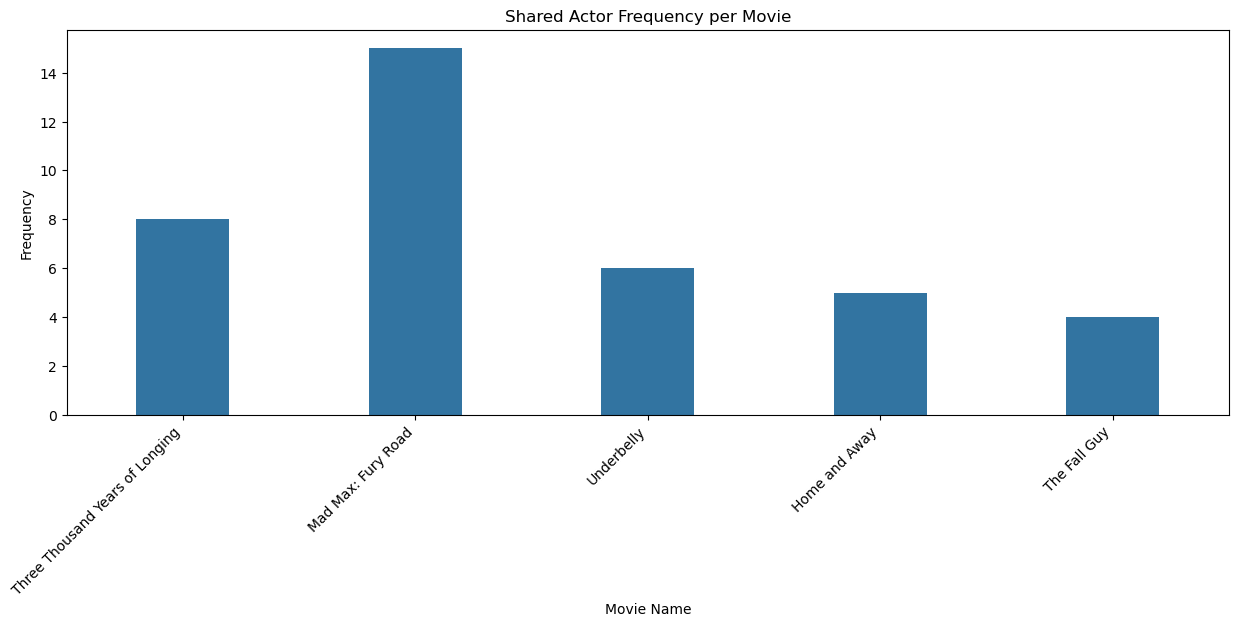

In [4]:
plot_results(test1_df, "Furiosa: A Mad Max Saga", 3)

#### Unit Test 2: First Validation

In [5]:
# Test Inputs
directory = "693134-dune-part-two"
actor = "1190668-timothee-chalamet"

# Test webscrape functions
actor2_df = parse_actor_page(df, actor) # test parse_actor_page
test2_df = parse_full_credits(directory) # test parse_full_credits

In [6]:
show_results(actor2_df)

movie_df Shape: (50, 2)
Number of Duplicates: 0
                actor            movie_or_TV_name
2   Timothée Chalamet          A Complete Unknown
10  Timothée Chalamet           A Man Named Scott
17  Timothée Chalamet     A Rainy Day in New York
18  Timothée Chalamet  Art of Style: Jean Cocteau
19  Timothée Chalamet               Beautiful Boy


movie_df Shape: (1880, 2)
Number of Duplicates: 0
                                      actor movie_or_TV_name
0                         Abdelaziz Boumane   Dune: Part Two
1  Abdelkarim Hussein Seli Mohamed Hassanin   Dune: Part Two
2                          Abdellah Echahbi   Dune: Part Two
3                                Adam Bloom   Dune: Part Two
4                                Adam Bloom             Open


The next movie you should see is: Dune


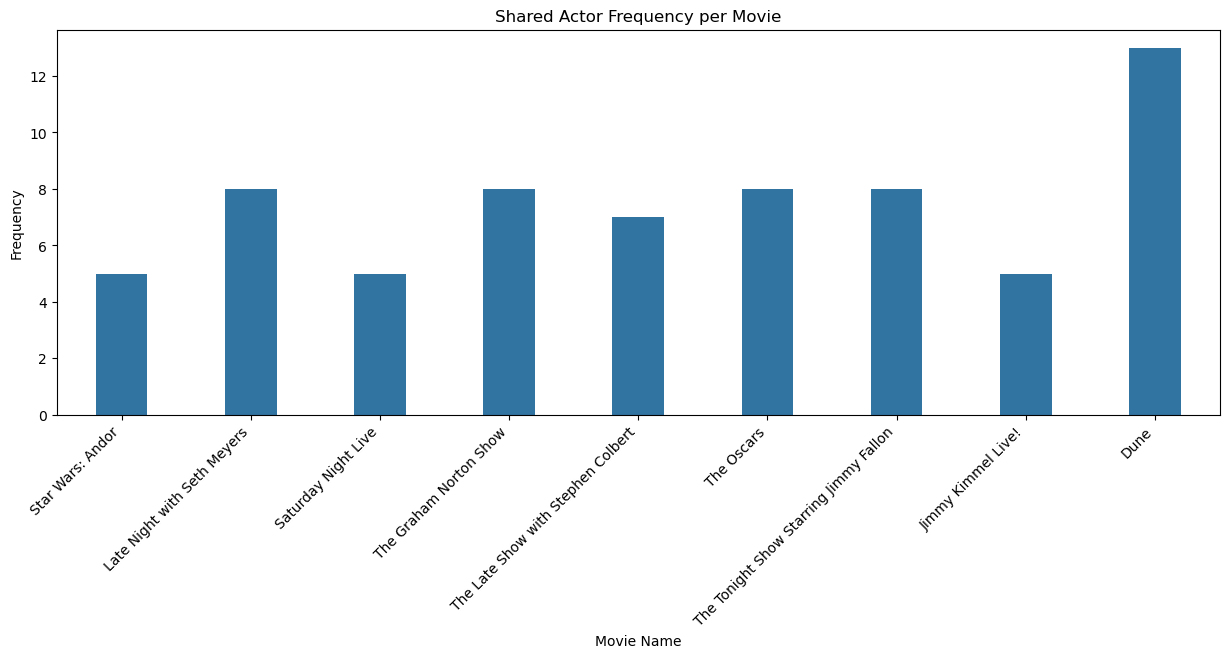

In [7]:
plot_results(test2_df, "Dune: Part Two", 4)

#### Unit Test 3: Second Validation

In [16]:
# Test Inputs
directory = "1891-the-empire-strikes-back"
actor = "2-mark-hamill"

# Test webscrape functions
actor3_df = parse_actor_page(df, actor) # test parse_actor_page
test3_df = parse_full_credits(directory) # test parse_full_credits

In [17]:
show_results(actor3_df)

movie_df Shape: (344, 2)
Number of Duplicates: 0
           actor                                   movie_or_TV_name
278  Mark Hamill                                      2 Stupid Dogs
253  Mark Hamill                              3rd Rock from the Sun
10   Mark Hamill  A Disturbance in the Force: How the Star Wars ...
90   Mark Hamill                                      A Fuller Life
184  Mark Hamill                            A Scooby-Doo! Christmas


movie_df Shape: (3562, 2)
Number of Duplicates: 0
         actor                        movie_or_TV_name
0  Alan Austen                       Salient Minus Ten
1  Alan Austen                 The Empire Strikes Back
2   Alan Flyng  House of the Long Shadows... revisited
3   Alan Flyng                      Return of the Jedi
4   Alan Flyng                 The Empire Strikes Back


The next movie you should see is: Return of the Jedi


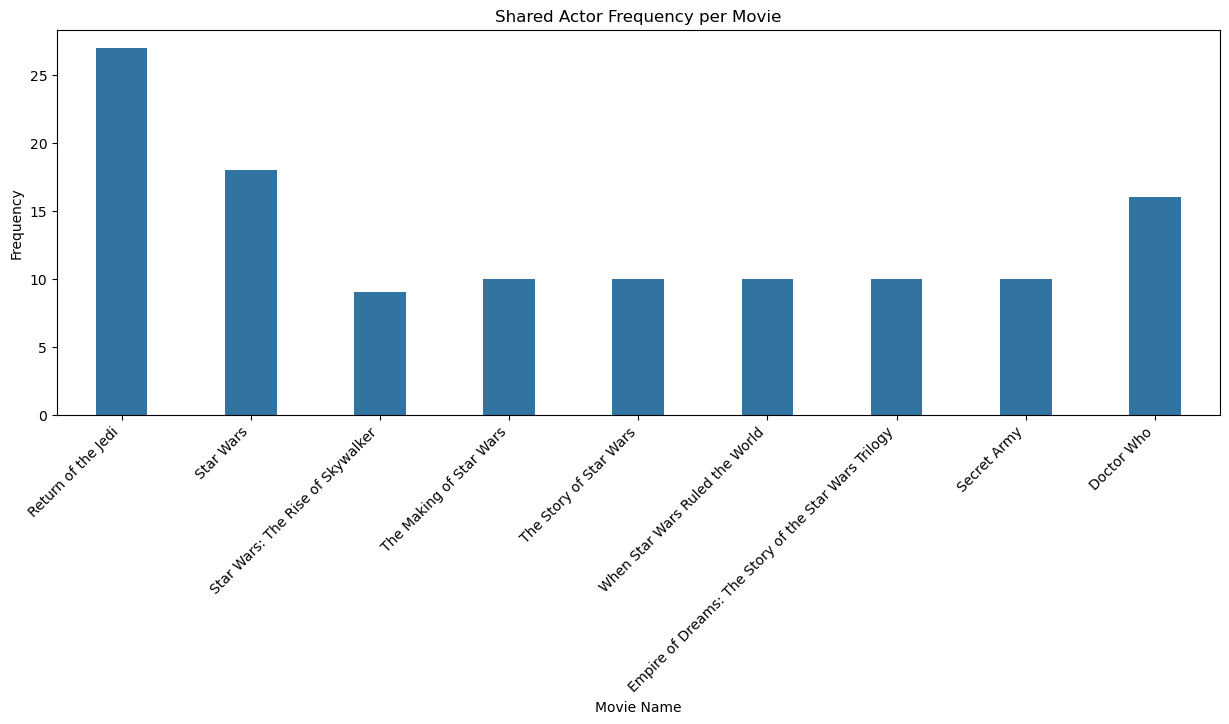

In [19]:
plot_results(test3_df, "The Empire Strikes Back", 8)

#### Unit Test 4: Test Adult Actor Filter

In [11]:
# Test Inputs
directory = "138697-don-jon"
actor = "24045-joseph-gordon-levitt"

# Test webscrape functions
actor4_df = parse_actor_page(df, actor) # test parse_actor_page
test4_df = parse_full_credits(directory) # test parse_full_credits

Mia Malkova Does Adult Films! Not Included.
Devon Does Adult Films! Not Included.
Alexis Texas Does Adult Films! Not Included.
Jenny Hendrix Does Adult Films! Not Included.
Damien Michaels Does Adult Films! Not Included.
Tori Black Does Adult Films! Not Included.
Kayden Kross Does Adult Films! Not Included.
Bree Olson Does Adult Films! Not Included.
Aletta Ocean Does Adult Films! Not Included.
Isis Taylor Does Adult Films! Not Included.
Misty Stone Does Adult Films! Not Included.
Loanne Bishop Does Adult Films! Not Included.
Jynx Maze Does Adult Films! Not Included.
Cheyne Collins Does Adult Films! Not Included.
Manuel Ferrara Does Adult Films! Not Included.
Mark Ashley Does Adult Films! Not Included.
Dani Daniels Does Adult Films! Not Included.
Sunny Lane Does Adult Films! Not Included.
Stoya Does Adult Films! Not Included.


In [12]:
show_results(actor4_df)

movie_df Shape: (127, 2)
Number of Duplicates: 0
                    actor                      movie_or_TV_name
72   Joseph Gordon-Levitt  (500) Days Of Summer: The Bank Heist
74   Joseph Gordon-Levitt                  (500) Days of Summer
96   Joseph Gordon-Levitt            10 Things I Hate About You
102  Joseph Gordon-Levitt                 3rd Rock from the Sun
61   Joseph Gordon-Levitt                                 50/50


In [13]:
# Names of actors of adult films credited in the movie, "Don Jon"
actor_adult = ['Mia Malkova', 'Devon', 'Alexis Texas', 'Jenny Hendrix']

# Check if adult actor names were included in actor column
for actor in actor_adult:
    print(f"{actor} occurances in df: {test4_df['actor'].str.contains(actor).sum()}")

Mia Malkova occurances in df: 0
Devon occurances in df: 0
Alexis Texas occurances in df: 0
Jenny Hendrix occurances in df: 0


movie_df Shape: (1524, 2)
Number of Duplicates: 0
          actor                       movie_or_TV_name
0  Amanda Perez                       A Moving Romance
1  Amanda Perez                     Brooklyn Nine-Nine
2  Amanda Perez                                Don Jon
3  Amanda Perez  Don't Trust the B---- in Apartment 23
4  Amanda Perez                                Dr. Ken


The next movie you should see is: Jimmy Kimmel Live!


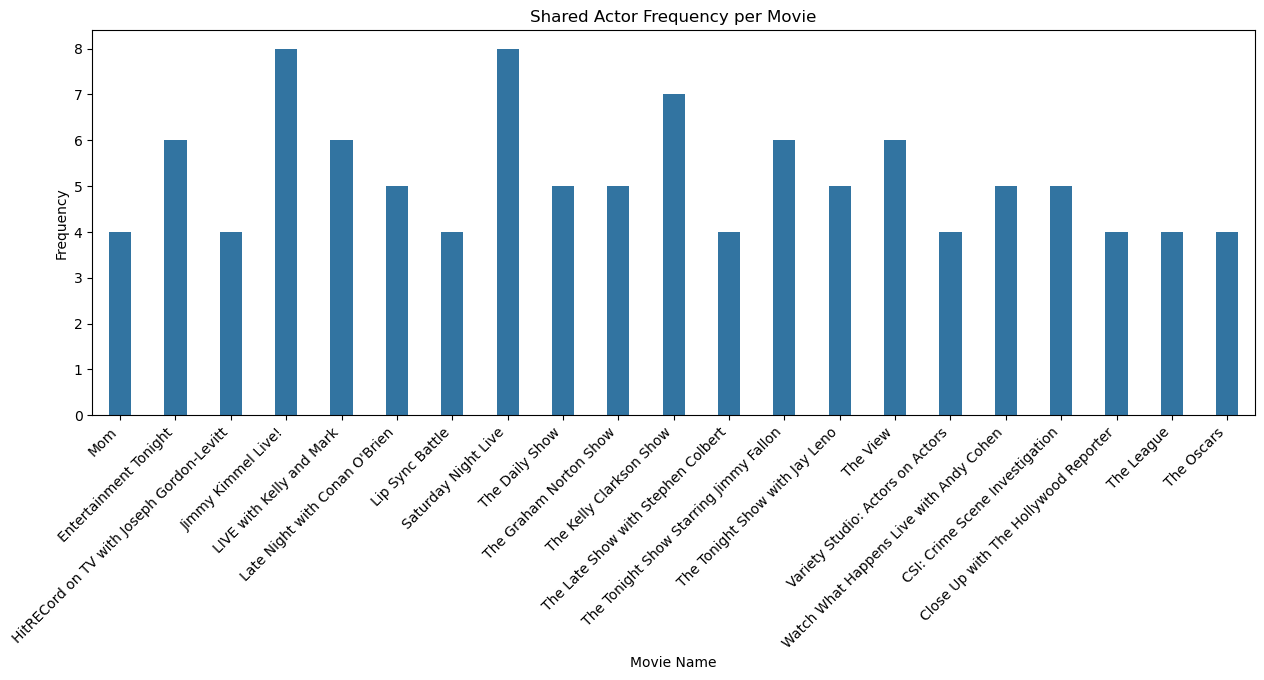

In [14]:
plot_results(test4_df, "Don Jon", 3)

#### Unit Test 5: Bad TMDB Directories

In [15]:
# Test Inputs
directory = "NOT_A_MOVIE"
actor = "NOT_AN_ACTOR"

# Try to run parse_full_credits with a bad directory
try:
    actor4_df = parse_actor_page(df, actor) # test error catch
except Exception:
    print("Error: Bad Actor Directory")

# Try to run parse_full_credits with a bad directory
try:
    test5_df = parse_full_credits(url) # test error catch
except Exception:
    print("Error: Bad Movie Directory")

Error: Bad Actor Directory
Error: Bad Movie Directory


Sources:
- [Scrapping Links](https://stackoverflow.com/questions/48938108/how-to-get-css-links-using-beautiful-soup)
- [Clear Cookies from Session](https://stackoverflow.com/questions/23816139/clear-cookies-from-requests-python)
- [Using Random Session User Agents](https://www.zenrows.com/blog/python-requests-user-agent#random-user-agent)
- [List of User Agents](https://gist.github.com/pzb/b4b6f57144aea7827ae4)
- [Closing Sessions](https://stackoverflow.com/questions/55354427/is-it-important-to-close-a-requests-session)